In [177]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

The first thing you will need to do is install our pyds2021 library. Uncomment the line below, install the package, then restart your kernel. After that you can comment it out again and proceed!

In [178]:
pip install --upgrade pyds2021

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyds2021-0.9-py3-none-any.whl (242 kB)
Note: you may need to restart the kernel to use updated packages.


In [179]:
import pyds2021 as pyds

In [180]:
class MyLinearReg:
    """
    This is a basic linear regression class.
    
    create the following methods (instructions are in the method docstrings)
    
    methods to complete:
    ______________
    
    _center_data: a function which centers the data. Should only be fed X_train

        arguments
        ------
        the following arguments should come from the training set:
        X: 2-dimensional nd.array
        the design or feature matrix, one column per feature and one row per datapoint
        y: 1-dimensional nd.array
        a 1-d numpy array representing the response variable
        ---------

        returns 
        _______
        centered X and y nd.arrays
    
    fit:
        a function which fits the data.
        
        arguments
        ---------
        same as _center_data
        ---------

        returns
        -------
        None
        
    predict: this method will make a prediction given X_test.
        
        Arguments
        ---------
        same as _center_data, but feed only the test set.
        ---------

        Returns
        -------
        y_pred_test: nd.array
            your prediction of y for the test set

    
    ______________
        
    Make sure the following attributes get assigned:
    self._x_means
    self._y_mean
    

    """
    
    def __init__(self) -> None:
        print("building linear regression instance")
    
    def _enforce_data_type(data):
        if type(data) != nd.array:
            return data.values
        else:
            return data
    
    def _center_data(self, X, y):
        """
        INSTRUCTIONS:
        1. assign `_x_means` to self, along the axis such that 
           the numbers of means matches the number of features (2)
        2. assign `_y_mean` to self (y.mean())
        3. subtract _x_means from X and assign it to X_centered
        4. subtract _y_mean from y and assign it to y_centered
        """
        self._x_means =X.mean(axis=0)
        self._y_mean = y.mean()

        X_centered, y_centered = X_c, y_c = X-self._x_means,y-self._y_mean

        return X_centered, y_centered


    def fit(self, X, y) -> None:
        """
        INSTRUCTIONS:
        1. center the data by calling _center_data
        2. Use the centered data to impliment the matrix formula for linear regression. 
        3. Use the matrix formula shown in class and assign the result to self.coef_
        4. Calculate the intercept by _y_mean - _x_means @ coef_ and save it as attribute intercept_
        """
        # The following code converts dataframes to nd.arrays if the input are pandas series or dfs
        try:
            X = X.values
            y = y.values
        except:
            pass
        assert len(X) == len(y), "X and y must have the same number of datapoints"

        # Your code starts here
        X_centered, y_centered =self._center_data(X,y)
     
        self.coef_=np.linalg.inv(X_centered.T @X_centered) @(X_centered.T@y_centered)
        self.intercept_ = self._y_mean - self._x_means @ self.coef_

    def predict(self, X) -> np.ndarray:
        """
        INSTRUCTIONS:
        1. Take the dot product of X and coef_ and add the intercept_.
        2. return the result
        """
        # Your code starts here
    
        yhat=X@self.coef_+self.intercept_
        return yhat

In [181]:
# Read the 'Advertising.csv' dataset
data_filename = 'Advertising.csv'

# Read data file using pandas libraries
df = pd.read_csv(data_filename)

In [182]:
# Take a quick look at the data
df.head()

,TV,Radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


Next set up the response variable and design matrix:
#### 1. Build a design matrix with ['TV', 'Radio'] as features
#### 2. Assign sales as response variable 'y'. 
**Make sure both are dataframes, not pandas series or numpy arrays**

In [183]:
### edTest(test_data_type) ###
X =df[['TV','Radio']]
y = df[['sales']]


In [184]:
### edTest(test_data) ###
# Split the dataset in training and testing with 80% training set 
# & set random state to 310 for reproducable results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=310)


In [185]:
### edTest(test_class) ###
#declare a class instance and assign it to my_linear_reg
my_linear_reg=MyLinearReg()

building linear regression instance


In [186]:
### edTest(test_attrs) ###
# Fit your model
my_linear_reg.fit(X_train,y_train)

In [187]:
# Make and save a prediction
y_pred_test =my_linear_reg.predict(X_test)
y_pred_test[0:5]

,0
22,6.538107
38,9.962830
186,9.593824
12,10.704001
189,6.056852


In [188]:
### edTest(test_instance) ###
# Calculate the mse:
mse = mean_squared_error(y_pred_test,y_test)
print(f'The test MSE is {mse}')

The test MSE is 2.4253793824081145


In [189]:
# Declare a class instance of sklearn LinearRegression and assign it to model
sk_lr = LinearRegression()

# Call the 'fit' method on the training data
sk_lr.fit(X_train,y_train)

# Predict on the test set using the 'predict' method
y_pred_test = sk_lr.predict(X_test)
print(y_pred_test[0:5])

sklearn_mse = mean_squared_error(y_pred_test,y_test)
print(f'The test MSE is {sklearn_mse}')

[[ 6.53810661]
 [ 9.96283011]
 [ 9.59382394]
 [10.70400124]
 [ 6.05685242]]
The test MSE is 2.425379382408113


In [190]:
# Print the sklearn betas and our betas
print(f'my betas: {my_linear_reg.coef_} sklearn_betas: {sk_lr.coef_}')

my betas: [[0.0451763 ]
 [0.19203259]] sklearn_betas: [[0.0451763  0.19203259]]


In [191]:
# Now print and compare the intercepts:
print(f'my intercept: {my_linear_reg.intercept_} sklearn_intercept: {sk_lr.intercept_}')

my intercept: [2.88846116] sklearn_intercept: [2.88846116]


## run the cells below after you are finished to view the results!

If you have done this correctly, your results should match our results.

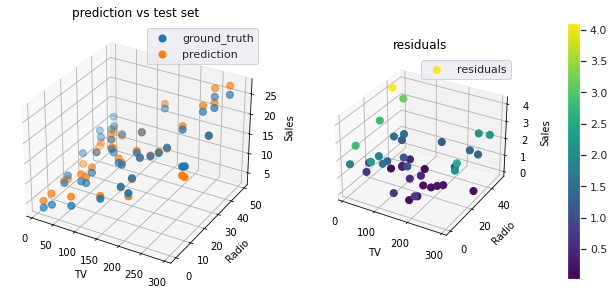

In [192]:
# Hyper-plane, check on your local system
pyds.plot3d(X_test, y_test, y_pred_test)

If your work is correct, then the following code should give the same results as the plot of your prediction!

building linear regression instance


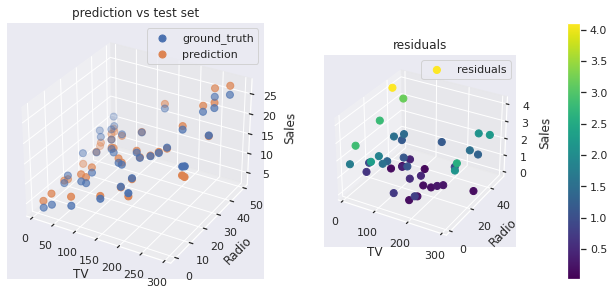

In [193]:
pyds.fit_and_plot_linreg(X_train, X_test, y_train, y_test)